<a href="https://colab.research.google.com/github/cledjan/LabProg/blob/main/Titanic_LabProg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados: Titanic
Base: https://www.kaggle.com/c/titanic

**Objetivo:**

1.   Análise:
   1.1. Análise exploratória dos dados;
   1.2. Detecção de dados duplicados;
   1.3. Detecção de dados faltantes;
   1.4. Detecção de outliers;
2.   Pré-Processamento
   2.1. Limpeza dos dados;
   2.2. Análise do balanceamento das classes; 
   2.3. Transformação de atributos categóricos; 
   2.4. Discretização de atributos.

# Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Análise

## Importar Dataset

In [ ]:
# 1. Carregar datasets

# Importando dataset de treino
input_file_train = "train.csv"
df_train = pd.read_csv(input_file_train, header = 0)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Dicionário de Dados:**

* Survived (Sobreviveu): 0 = Não, 1 = Sim
* Pclass (Classe): Classe de ingresso 
* Sex (Sexo): Sexo do passageiro
* Age (Idade): Idade em anos
* Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
* Parch: Quantidade de pais / crianças a bordo do Titanic
* Ticket (Bilhete): Número do bilhete de embarque
* Fare (Tarifa): Tarifa paga pelo Passageiro
* Cabin (Cabine): Número de cabine
* Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q=Queenstown, S = Southampton)




## Identificar tipos de cada variável

In [ ]:
#Checando tipo de dados
type(df_train)

pandas.core.frame.DataFrame

In [ ]:
#O método dtypes() exibe apenas os tipos das variáveis
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Checando tipo de dados
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Quantidade de observações e variáveis no banco de dados
df_train.shape

(891, 12)

In [ ]:
print('A base de dados apresenta {} registros (passageiros) e {} variáveis'.format(df_train.shape[0], df_train.shape[1]))

A base de dados apresenta 891 registros (passageiros) e 12 variáveis


**Para as features numéricas temos o seguinte cenário:**

*   3 variáveis discretas: pclass, sibSp e parch.
*   2 variáveis contínuas: fare e age.
*   1 variável Id: passengerid (chave primária).
*   1 binário: survived (booleano).

**Para as features categóricas, temos:**

*   4 variáveis nominais: Name, Sex, Ticket e Cabin




## Estatística dos dados

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Percentual de dados faltantes 
round(df_train.isnull().mean() *100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
#Retorna o número de vezes que um valor aparece em uma tabela
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Com a função unique() podemos visualizar as classes presentes em uma determina feature categórica.
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
#Registros duplicados
#A função 'duplicated' retorna uma Series com valores bool, sendo 'true' os valores duplicados
duplicados = df_train.duplicated()
duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# Como excluir dulicados?]
duplicados.sum()

0

## Valores vazios

In [ ]:
# Checa valores vazios no dataset 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Survived

In [ ]:
# Qual a porcentagem de sobreviventes?
# Balanceamento dos dados

df_train.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Percentual de Sobrevidentes')

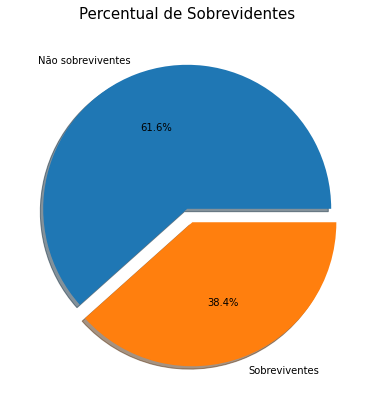

In [ ]:
#Gráfico Pizza
#Cria a figura e traça os traça os eixos
fig = plt.figure(figsize=(6,5))
eixo = fig.add_axes([0,0,1,1])

explodir = [0,0.1]

#criação gráfico pizza
#Porcentagem de cada fatia - autopct
#Dar ênfase em determinados valores - explode
eixo.pie(df_train['Survived'].value_counts(), explode=explodir, shadow=True, labels=('Não sobreviventes','Sobreviventes'),autopct='%.1f%%')
#título
eixo.set_title('Percentual de Sobrevidentes', size=15, pad=10)

## Sex

(array([577.,   0.,   0.,   0., 314.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

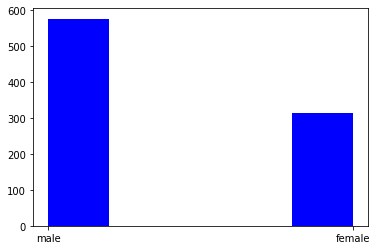

In [ ]:
#Total de homens x mulheres
plt.hist(df_train['Sex'],bins=5, color=('blue'))

(array([233.,   0.,   0.,   0., 109.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

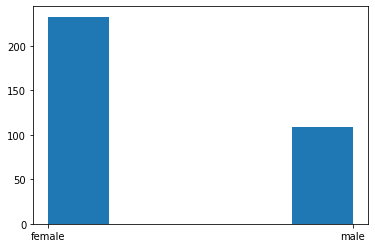

In [ ]:
#Total de homens x mulheres sobreviventes
df_sobreviventes = df_train.query('Survived == 1')
plt.hist(df_sobreviventes['Sex'], bins=5)


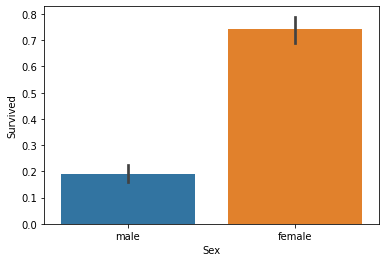

In [ ]:
#Relação do sexo com a sobrevivência
sns.barplot(x='Sex', y='Survived',data=df_train)

## Age

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

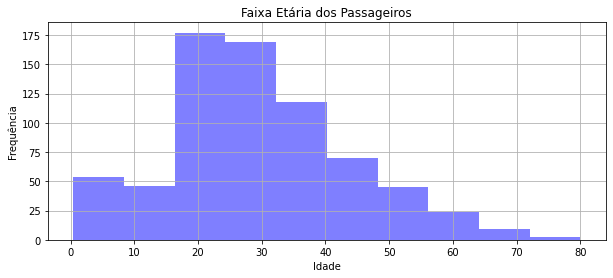

In [ ]:
#Gera histograma de frequencia de idade
plt.figure();
df_train.hist(column='Age', color=('blue'), alpha=0.5, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

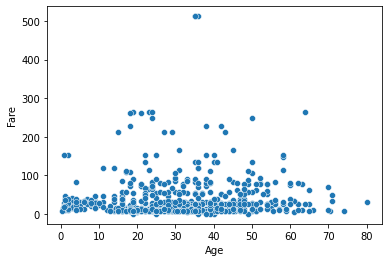

In [ ]:
#Gráfico de dispersão
sns.scatterplot(x= 'Age', y= 'Fare', data=df_train)

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

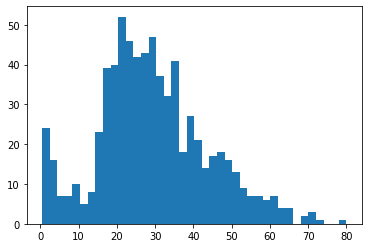

In [ ]:
# Plot o histograma para checar a frequência de distribuição das idades
# Com 20 intervalos
plt.hist(df_train['Age'],bins=40) # Criar intervalos de: 0 a 15; 15 a 30; 30 a 45; 45 a 65; acima de 65


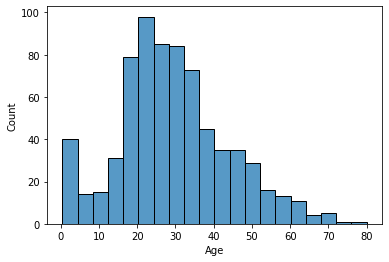

In [ ]:
sns.histplot(df_train, x='Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

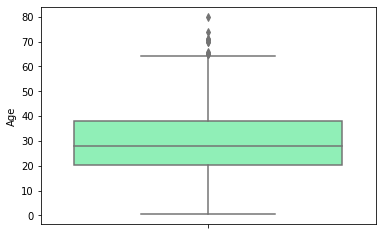

In [ ]:
# Gerar o bloxpot para checar os valores outliers (acima de 65 anos)
# Mostra o resumo das propriedades de um conjunto de valores numéricos como mínimo, primeiro quartil, mediana, terceiro quartil e máximo
sns.boxplot(y='Age', data=df_train, palette='rainbow')

# Métricas estatísticas
df_train['Age'].describe()

**Violinplot**

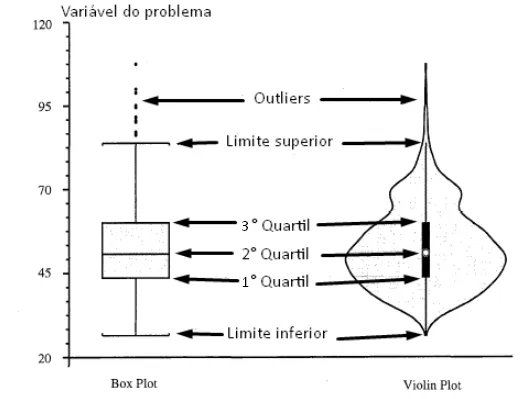

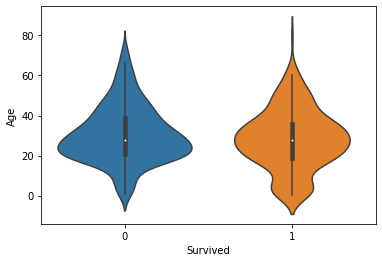

In [ ]:
# Combina a visualização do histograma e boxplot.
# Além das informações que o boxplot já traz consigo, existe a exibição da densidade dos dados. 
sns.violinplot(x='Survived', y='Age', data=df_train)

In [ ]:
#Divide os dados em grupos de criancas e adultos
df_train['Crianca_Adulto'] = 0
df_train.loc[df_train[df_train['Age'] < 18].index, 'Crianca_Adulto'] = 'Criança'
df_train.loc[df_train[df_train['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'


In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Crianca_Adulto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adulto


(Text(0, 0.5, ''), Text(0.5, 0, ''))

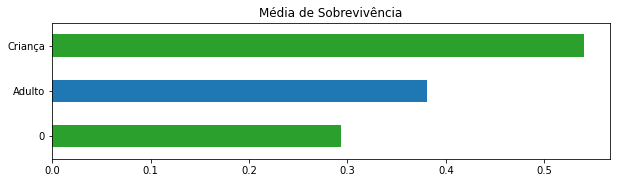

In [ ]:
#Gera grafico de sobrevivencia de criancas e adultos
df_train.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='Média de Sobrevivência', figsize=(10,2.5), 
                                                                      color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

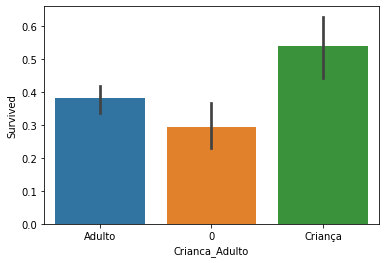

In [ ]:
sns.barplot(x='Crianca_Adulto', y='Survived',data=df_train)

In [ ]:
# Criando intervalos de Age

# Derivando a coluna Age para intervalos de idade (0 a 15; 15 a 30; 30 a 45; 45 a 65; acima de 65)
X1 = df_train

for index, row in X1.iterrows():
  if(row['Age'] <= 12):
    X1.loc[index, 'AgeIn'] = 'Criança'
  elif(row['Age'] > 12 and row['Age'] <= 18):
    X1.loc[index, 'AgeIn'] = 'Jovem'
  elif(row['Age'] > 18 and row['Age'] <= 30):
    X1.loc[index, 'AgeIn'] = 'Adulto Jovem'
  elif(row['Age'] > 30 and row['Age'] <= 50):
    X1.loc[index, 'AgeIn'] = 'Adulto'
  else:
    X1.loc[index, 'AgeIn'] = 'Idoso'


(Text(0, 0.5, ''), Text(0.5, 0, ''))

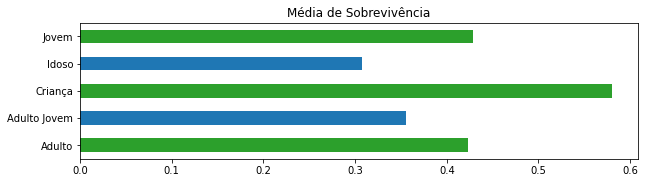

In [ ]:
#Gera grafico de sobrevivencia de criancas e adultos
X1.groupby('AgeIn')['Survived'].mean().plot.barh(title='Média de Sobrevivência', figsize=(10,2.5), 
                                                                      color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

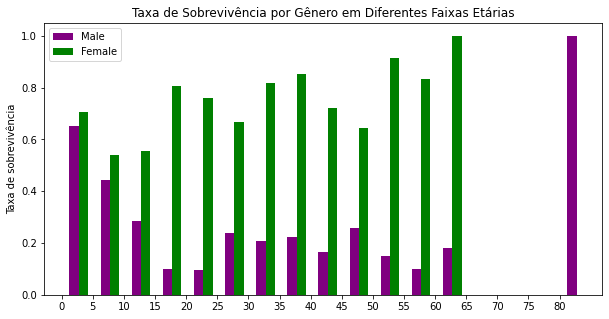

In [ ]:
#Gerar listas das taxas de sobrevivência de gênero para cada faixa etária de cinco anos entre 0 e 85
listataxasmale = [df_train[(df_train['Sex']=='male')&(df_train['Age']>=i)&(df_train['Age']<(i+5))]['Survived'].mean() for i in range(0,85,5)]
listataxasfemale = [df_train[(df_train['Sex']=='female')&(df_train['Age']>=i)&(df_train['Age']<(i+5))]['Survived'].mean() for i in range(0,85,5)]

#Cria figura
fig,ax = plt.subplots(figsize=(10,5))
plt.title('Taxa de Sobrevivência por Gênero em Diferentes Faixas Etárias')
plt.ylabel('Taxa de sobrevivência')

#Gerar barplots lado a lado
#Arange retorna valores uniformemente espaçados dentro de um determinado intervalo (ponto de partida, ponto de parada, incremento)
plt.bar(np.arange(2,87,5), listataxasmale, color='Purple', width=1.5, label='Male')
plt.bar(np.arange(3.5,88.5,5), listataxasfemale, color='Green', width=1.5, label='Female')

plt.xticks(np.arange(0,85,5))

plt.legend();

#Fonte: https://www.eamonfleming.com/projects/titanic.html

## Embarked

(Text(0, 0.5, ''), Text(0.5, 0, ''))

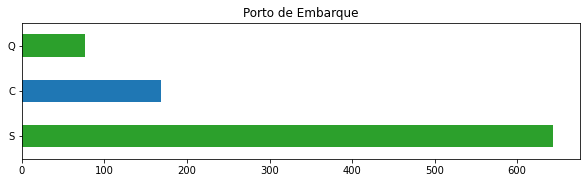

In [ ]:
#Embarked
df_train['Embarked'].value_counts().plot.barh(title='Porto de Embarque', figsize=(10,2.5), 
                                                                      color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

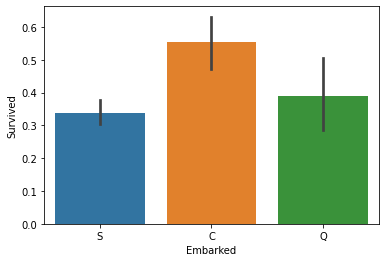

In [ ]:
#Relação de Embarked com a sobrevivência
sns.barplot(x='Embarked', y='Survived',data=df_train)

## Pclass

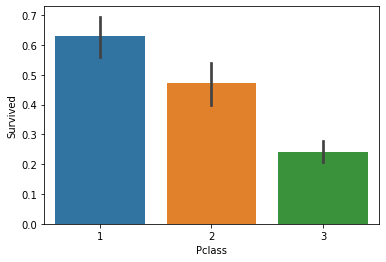

In [ ]:
#Relação da classe com a sobrevivência
sns.barplot(x='Pclass', y='Survived',data=df_train)

## Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

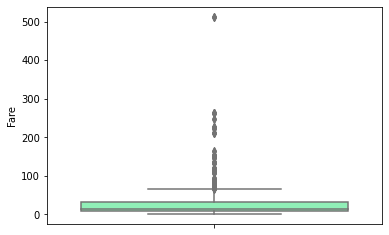

In [ ]:
# Plot o bloxpot para checar os valores outliers (acima de 90 aproximadamente)
sns.boxplot(y='Fare', data=df_train, palette='rainbow')

# Métricas estatísticas
df_train['Fare'].describe()

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

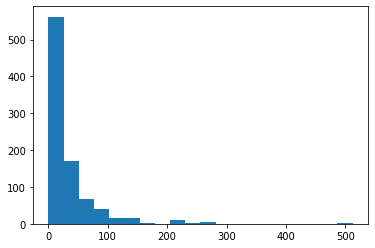

In [ ]:
# Plot o histograma para checar a frequência de distribuição das tarifas
# Com 20 intervalos
plt.hist(df_train['Fare'],bins=20)

In [ ]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
IQR = df_train.Fare.describe()[6] - df_train.Fare.describe()[4]
quartil_sup = df_train.Fare.quantile(0.75) + (IQR * 1.5)
quartil_inf = df_train.Fare.quantile(0.25) - (IQR * 1.5)
print('Valores dos outliers referente a Fare são - limite superior: {a}; limite inferior: {b}'.format(a = quartil_sup, b = quartil_inf))

Valores dos outliers referente a Fare são - limite superior: 65.6344; limite inferior: -26.724


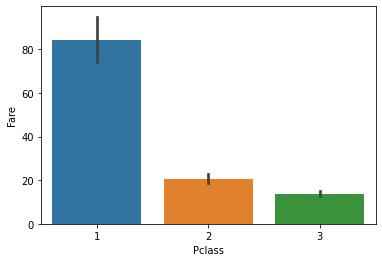

In [ ]:
#Relação da classe com fare
plot = sns.barplot(x='Pclass', y='Fare',data=df_train)


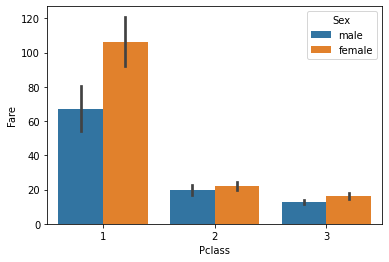

In [ ]:
#Relação de classe, tarifa e sexo
sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Sex', data = df_train)
 
plt.show()

In [ ]:
# Criando intervalos de Fare
X1 = df_train
# Derivando a coluna Fare para intervalos
for index, row in X1.iterrows():
  if(row['Fare'] <= 25):
    X1.loc[index, 'FareIn'] = 0
  elif(row['Fare'] > 25 and row['Fare'] <= 50):
    X1.loc[index, 'FareIn'] = 1
  else:
    X1.loc[index, 'FareIn'] = 2


(Text(0, 0.5, ''), Text(0.5, 0, ''))

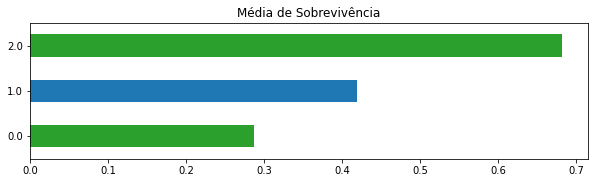

In [ ]:
#Gera grafico de tarifa
X1.groupby('FareIn')['Survived'].mean().plot.barh(title='Média de Sobrevivência', figsize=(10,2.5), 
                                                                      color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

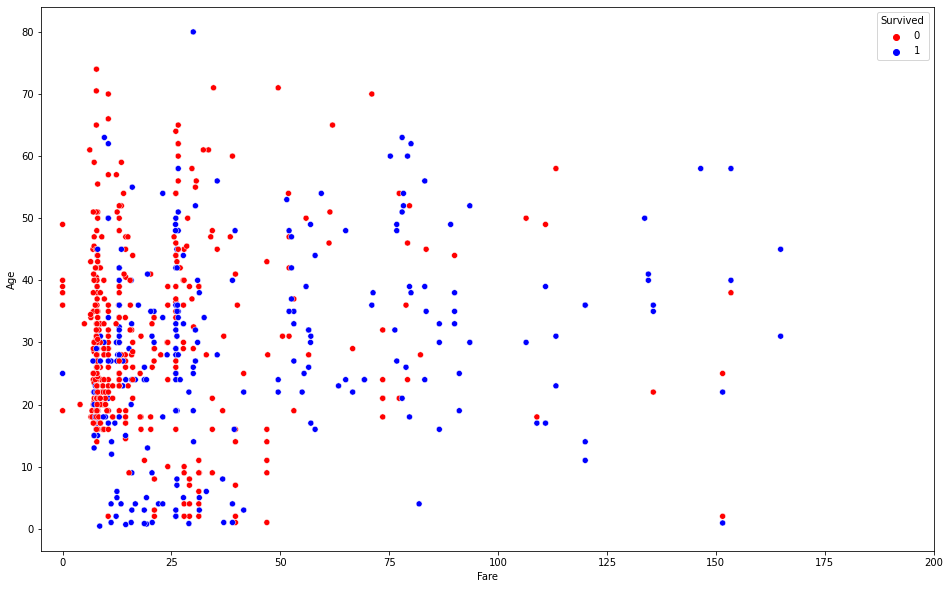

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
plt.xlim(-5,200)

ax = sns.scatterplot(x='Fare',y='Age',hue='Survived',palette=['red','blue'],data=df_train,ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba655d3f10>,
      dtype=object)

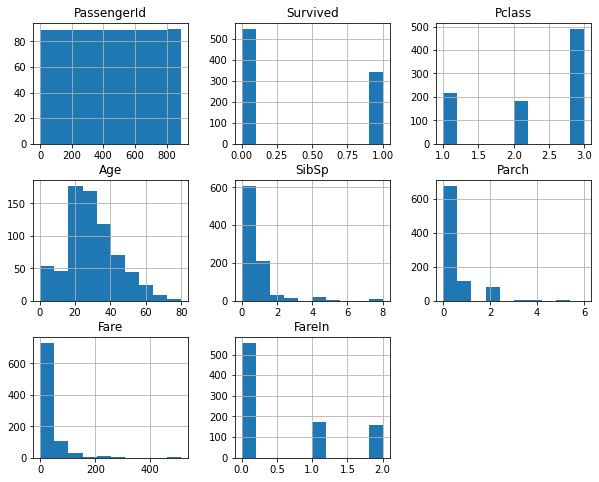

In [ ]:
df_train.hist(figsize=(10,8))

## Mapa de Calor

* Checa a correlação entre os atributos (features) com Survived
* Necessário converter recursos categóricos em numéricos para que possamos calcular coeficiente de correlação.

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Crianca_Adulto,AgeIn,FareIn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto,Adulto Jovem,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto,Adulto,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto,Adulto Jovem,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto,Adulto,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto,Adulto,0.0


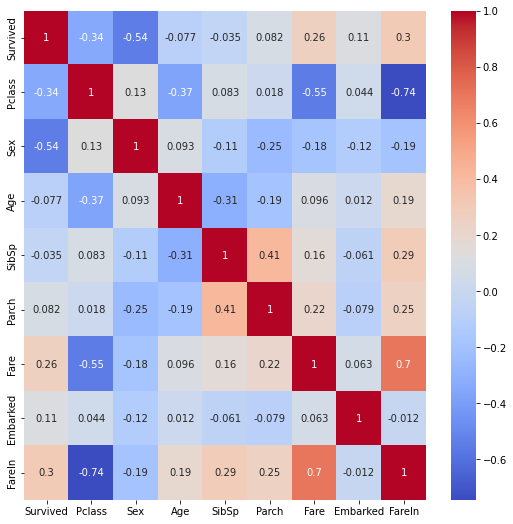

In [ ]:
df_heatmap = df_train.drop(['PassengerId'], axis = 1) 

df_heatmap["Sex"] = [1 if i == "male" else 0 for i in df_heatmap["Sex"]] 
df_heatmap["Embarked"] = [0 if i == "S" else i for i in df_heatmap["Embarked"]] 
df_heatmap["Embarked"] = [1 if i == "C" else i for i in df_heatmap["Embarked"]] 
df_heatmap["Embarked"] = [2 if i == "Q" else i for i in df_heatmap["Embarked"]] 

# annot - Exibir o coeficiente de correlação
# corr() - Mostra os coeficientes de correlação de todas as variáveis
plt.subplots(figsize=(9,9))
sns.heatmap(df_heatmap.corr(), cmap='coolwarm', annot=True)

# Suvirved se relaciona fortemente com Sex

In [ ]:
df_heatmap.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareIn
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669,0.300516
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835,-0.744338
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593,-0.189824
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186,0.190447
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606,0.292501
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320,0.247813
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462,0.701598
Embarked,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000,-0.012488
FareIn,0.300516,-0.744338,-0.189824,0.190447,0.292501,0.247813,0.701598,-0.012488,1.000000


# Pré-processamento

## Limpeza e Remoção de dados

In [ ]:
#Remover Colunas 
# Dropando a coluna PassengerId do dataset 
df_train = df_train.drop(['PassengerId'], axis = 1) 


In [ ]:
# Limpar Dados Faltosos

# Dropando a coluna Cabin do dataset (valores vazios: 77%)
df_train = df_train.drop(['Cabin'], axis = 1) 
#df_train = df_train.drop(columns=['Cabin'])

# Deletando os valores vazios dos atributo Embarked do dataset
df_train.dropna(subset=['Embarked'], inplace=True)

In [ ]:
df_train.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Crianca_Adulto      0
AgeIn               0
FareIn              0
dtype: int64

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Crianca_Adulto,AgeIn,FareIn,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2,Adulto,Adulto Jovem,0.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0,Adulto,Adulto,2.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2,Adulto,Adulto Jovem,0.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2,Adulto,Adulto,2.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2,Adulto,Adulto,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,2,Adulto,Adulto Jovem,0.0,Rare
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,2,Adulto,Adulto Jovem,1.0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,2,0,Idoso,0.0,Miss
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,0,Adulto,Adulto Jovem,1.0,Mr


In [ ]:
# Tranformação de dados categóricos em numéricos
le = LabelEncoder()

df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_train['Ticket'] = le.fit_transform(df_train['Ticket'])

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Crianca_Adulto,AgeIn,FareIn,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2,Adulto,Adulto Jovem,0.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0,Adulto,Adulto,2.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2,Adulto,Adulto Jovem,0.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2,Adulto,Adulto,2.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2,Adulto,Adulto,0.0,Mr


In [ ]:
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareIn
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.163517,0.300516
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.157112,-0.744338
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.104057,-0.189824
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.025252,0.190447
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.066654,0.292501
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,0.038322,0.247813
Ticket,-0.164549,0.319869,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,-0.006041,-0.179866
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.221226,0.701598
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.006041,-0.221226,1.000000,-0.154593
FareIn,0.300516,-0.744338,-0.189824,0.190447,0.292501,0.247813,-0.179866,0.701598,-0.154593,1.000000


## Criar coluna 'Title'

In [ ]:
titles = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Rare": "Rare"}

# extraindo os titulos
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Crianca_Adulto,AgeIn,FareIn,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto,Adulto Jovem,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto,Adulto,2.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto,Adulto Jovem,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto,Adulto,2.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto,Adulto,0.0,Mr


In [ ]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
# substituir títulos com um título mais comum ou como Rare
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')


In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Crianca_Adulto,AgeIn,FareIn,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2,Adulto,Adulto Jovem,0.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0,Adulto,Adulto,2.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2,Adulto,Adulto Jovem,0.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2,Adulto,Adulto,2.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2,Adulto,Adulto,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,2,Adulto,Adulto Jovem,0.0,Rare
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,2,Adulto,Adulto Jovem,1.0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,2,0,Idoso,0.0,Miss
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,0,Adulto,Adulto Jovem,1.0,Mr


In [ ]:
df_train.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Crianca_Adulto      0
AgeIn               0
FareIn              0
Title               0
dtype: int64

In [ ]:
#SUBSTITUIR VALOR NULO DE AGE POR OUTRO VALOR DEPENDENDO DO TITLE CRIADO

#interrows() - retorna tuplas com índice e série
for index, row in df_train.iterrows():
  if(pd.isna(row['Age'])):
    df_train.loc[index, 'Age'] = df_train.groupby('Title')['Age'].mean()[row['Title']]


In [ ]:
df_train.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Crianca_Adulto    0
AgeIn             0
FareIn            0
Title             0
dtype: int64